In [49]:
import sys, os
sys.path.append(os.path.join('..', 'scripts'))
sys.path.append(os.path.join('..', 'scripts/llp_bouncing'))
import figure_utils as utils
import lif_utils
import predict_llp
import predict_llp_ssp

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pytry
import os.path

import glob

In [2]:
lmu_time, lmu_env, lmu_pred_x, lmu_pred_y = predict_llp.run_trial(q=10,theta=0.5,pred_steps=10,duration=400)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [50]:
ssp_time, ssp_env, ssp_pred_x, ssp_pred_y = predict_llp_ssp.run_trial(q=10,theta=0.5,pred_steps=10,duration=400)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [70]:
dt=1e-3
window=int(0.5/dt)

def rmse(xs):
    return np.sqrt(np.mean(np.power(xs,2)))

def smooth(x, window_len):
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    w=np.ones(window_len,'d')

    return np.convolve(w/w.sum(),s,mode='valid')
### end smooth

def smooth_error(env, pred_x, pred_y, time, window):
    num_steps = env.shape[0]
    real_xs = env[:,0]
    real_ys = env[:,1]
    errors = np.zeros((num_steps - window,))

    for t in range(num_steps - window):
        idxs = np.arange(t,t+window,window//pred_x.shape[1])
        errors[t] = rmse(np.array([env[idxs,0] - pred_x[t,:], env[idxs,1] - pred_y[t,:]]))
    ### end for

    smoothed_errors = smooth(errors, int(2 * window))
    max_time = min(time.shape[0], smoothed_errors.shape[0])
    
    return smoothed_errors, max_time
lmu_smoothed_errors, lmu_max_time = smooth_error(lmu_env, lmu_pred_x, lmu_pred_y, lmu_time, window)
ssp_smoothed_errors, ssp_max_time = smooth_error(ssp_env, ssp_pred_x, ssp_pred_y, ssp_time, window)

Saving to llp_ball_prediction_figure.large.pdf


/home/furlong/projects/cnrg/brain_sciences_biological_computation_2022/figures/../scripts/figure_utils.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(target,


Extracting bounding box of file llp_ball_prediction_figure.large.pdf
Optimising PDF and saving to llp_ball_prediction_figure.pdf


GPL Ghostscript 9.50: Can't embed the complete font LinBiolinumTB as it is too large, embedding a subset.
GPL Ghostscript 9.50: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.
GPL Ghostscript 9.50: Can't embed the complete font LibertinusT1Math as it is too large, embedding a subset.
/home/furlong/installed/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


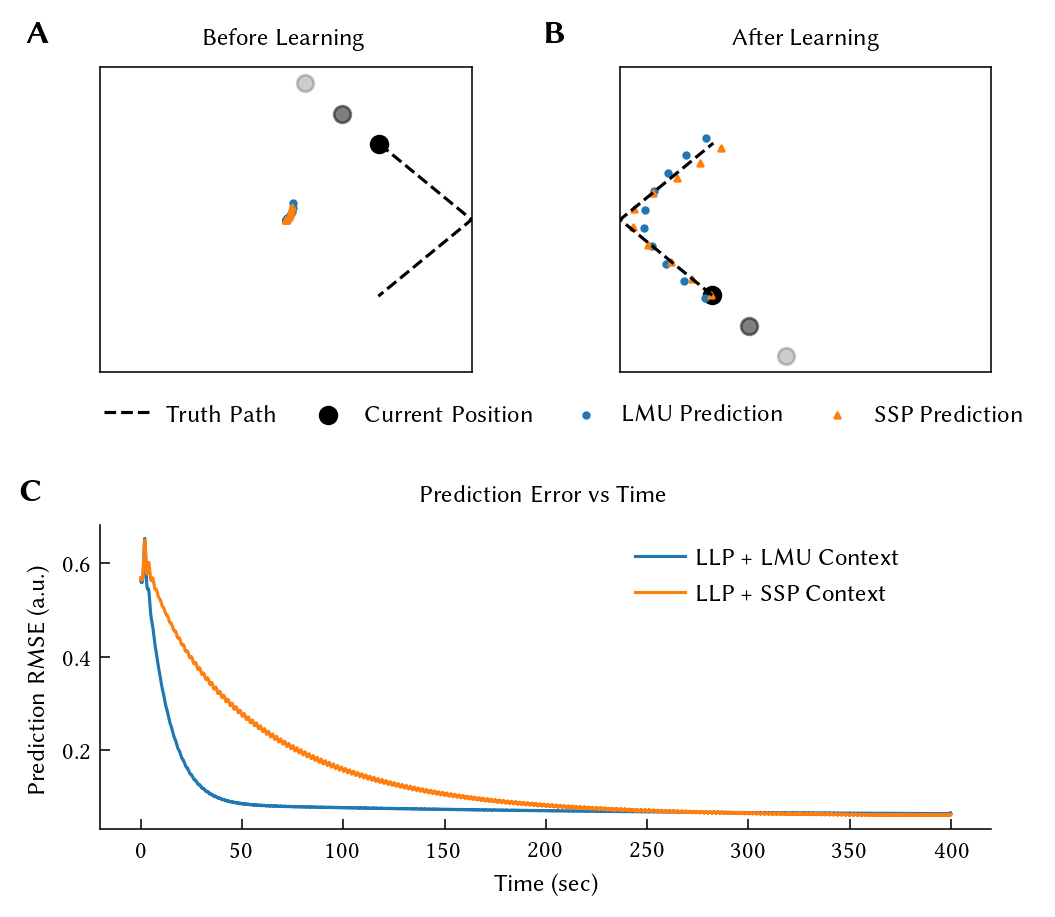

In [88]:
early_idx=250
late_idx=-750

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(5.75, 3*1.65), tight_layout=True)
gs = gridspec.GridSpec(2, 2, wspace=0.4, hspace=0.5, width_ratios=[1,1])

# Figure 1.a - Early Predictions

ax1 = fig.add_subplot(gs[0,0])

ax1.plot(lmu_env[early_idx:early_idx+window,0], lmu_env[early_idx:early_idx+window,1], c='black', ls='--', label='Truth Path')
ax1.scatter(lmu_env[early_idx,0], lmu_env[early_idx,1],c='black', label='Current Position')
ax1.scatter(lmu_env[early_idx-100,0], lmu_env[early_idx-100,1], c='black', alpha=0.5)
ax1.scatter(lmu_env[early_idx-200,0], lmu_env[early_idx-200,1], c='black', alpha=0.2)

ax1.scatter(lmu_pred_x[early_idx,:], lmu_pred_y[early_idx,:], s=4, marker='o', c='tab:blue', label='LMU Prediction')
ax1.scatter(ssp_pred_x[early_idx,:], ssp_pred_y[early_idx,:], s=4, marker='^', c='tab:orange', label='SSP Prediction')


ax1.set_xticks([])
ax1.set_xlim(-1,1)

ax1.set_yticks([])
ax1.set_ylim(-1,1)
ax1.spines['right'].set_visible(True)
ax1.spines['top'].set_visible(True)

ax1.legend(loc="upper center", ncol=4, bbox_to_anchor=(1.25, -0.03), columnspacing=1.0, handlelength=2, handletextpad=0.5)
ax1.set_title(f'Before Learning', x=0.5, y=1., va="bottom")
ax1.text(-0.2,
         1.0555,
         '\\textbf{A}',
         fontsize=12,
         transform=ax1.transAxes,
         va="bottom")


### Figure 2 -- Late predictions
ax2 = fig.add_subplot(gs[0,1])

#ax2.plot(time[:max_steps], mean_se[:max_steps] / np.mean(target_vals), label='Prediction Error', ls=line_styles[0])

#ax2.scatter(env[late_idx,0], env[late_idx,1])
ax2.scatter(lmu_env[late_idx,0], lmu_env[late_idx,1],c='black')
ax2.scatter(lmu_env[late_idx-100,0], lmu_env[late_idx-100,1], c='black', alpha=0.5)
ax2.scatter(lmu_env[late_idx-200,0], lmu_env[late_idx-200,1], c='black', alpha=0.2)
ax2.plot(lmu_env[late_idx:late_idx+window,0], lmu_env[late_idx:late_idx+window,1], c='black', ls='--', label='Ground Truth')
ax2.scatter(lmu_pred_x[late_idx,:], lmu_pred_y[late_idx,:], 
         s=4, 
         marker='o', 
         c='tab:blue', label='LMU Prediction')
ax2.scatter(ssp_pred_x[late_idx,:], ssp_pred_y[late_idx,:], 
         s=4, 
         marker='^', 
         c='tab:orange', label='SSP Prediction')

ax2.set_xticks([])
ax2.set_xlim(-1,1)

ax2.set_yticks([])
ax2.set_ylim(-1,1)

ax2.spines['right'].set_visible(True)
ax2.spines['top'].set_visible(True)

num_steps = lmu_env.shape[0]
#ax2.legend(loc="upper center", ncol=1, bbox_to_anchor=(0.5, 1.1), columnspacing=1.0, handlelength=2, handletextpad=0.5)
ax2.set_title(f'After Learning', x=0.5, y=1., va="bottom")
ax2.text(-0.2,
         1.0555,
         '\\textbf{B}',
         fontsize=12,
         transform=ax2.transAxes,
         va="bottom")


### Figure 3 -- Reduction
ax3 = fig.add_subplot(gs[1, :])
max_time = min(lmu_max_time, ssp_max_time)
ax3.plot(lmu_time[:max_time], lmu_smoothed_errors[:max_time], label='LLP + LMU Context')
ax3.plot(ssp_time[:max_time], ssp_smoothed_errors[:max_time], label='LLP + SSP Context')
ax3.set_xlabel('Time (sec)')
ax3.set_ylabel('Prediction RMSE (a.u.)')
ax3.set_title('Prediction Error vs Time', x=0.5, y=1., va="bottom")
ax3.text(-0.09,
         1.0555,
         '\\textbf{C}',
         fontsize=12,
         transform=ax3.transAxes,
         va="bottom")
ax3.legend(loc="upper center", ncol=1, bbox_to_anchor=(0.75, 1.), columnspacing=1.0, handlelength=2, handletextpad=0.5)

fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()


utils.save(fig, "llp_ball_prediction_figure.pdf")